# Importing stuff
- to properly run the analysis we need to import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

- matplotlib to run the graphs inline

In [2]:
matplotlib inline

# Getting the data
- Dataset downloaded from the site https://www.ssa.gov/oact/babynames/limits.html
- Dataset should be put to the `names-dataset` directory

In [3]:
open('names-dataset/yob2015.txt','r').readlines()[:5]


['Emma,F,20468\n',
 'Olivia,F,19713\n',
 'Sophia,F,17437\n',
 'Ava,F,16391\n',
 'Isabella,F,15641\n']

# Load the data into Pandas Data Frame
- the data exists in three columns, lets name our columns properly

In [4]:
names2015 = pd.read_csv('names-dataset/yob2015.txt', names = ['Name', 'Sex', 'Babies'])
names2015.head()

,Name,Sex,Babies
0,Emma,F,20468
1,Olivia,F,19713
2,Sophia,F,17437
3,Ava,F,16391
4,Isabella,F,15641


# Modify the data 

- Concatenating pandas objects will allow us to work with all the separate text files within the names directory.

- To concatenate these, we’ll first need to initialize a list by assigning a variable to an unpopulated list data type:

In [5]:
all_years = []

- once we’ve done that, we’ll use a for loop to iterate over all the files by year, which range from 1880-2015. We’ll add +1 to the end of 2015 so that 2015 is included in the loop.
- Within the loop, we’ll append to the list each of the text file values, using a string formatter to handle the different names of each of these files. We’ll pass those values to the year variable. Again, we’ll specify columns for Name, Sex, and the number of Babies.
- Additionally, we’ll create a column for each of the years to keep those ordered. This we can do after each iteration by using the index of -1 to point to them as the loop progresses.
- Finally, we’ll add it to the pandas object with concatenation using the pd.concat() function. We’ll use the variable all_names to store this information.

In [6]:
for year in range(1880, 2015+1):
    all_years.append(pd.read_csv('names-dataset/yob{}.txt'.format(year),
                                 names = ['Name', 'Sex', 'Babies']))
    all_years[-1]['Year'] = year

all_names = pd.concat(all_years)



- print out the last 5 entries of the  table 

In [9]:
all_names.tail()

,Name,Sex,Babies,Year
33151,Zykell,M,5,2015
33152,Zyking,M,5,2015
33153,Zykir,M,5,2015
33154,Zyrus,M,5,2015
33155,Zyus,M,5,2015


# Grouping data
- With pandas you can group data by columns with the `.groupby()` function. Using our all_names variable for our full dataset, we can use `groupby()` to split the data into different buckets.

- Let’s group the dataset by sex and year. We can set this up like so:

In [11]:
group_name = all_names.groupby(['Sex', 'Year'])

- To display values we will need to give instructions. We can calculate `.size()`, `.mean()`, and `.sum()`, for example, to return a table.

- Let’s start with .size():

In [13]:
group_name.size()

Sex  Year
F    1880      942
     1881      938
     1882     1028
     1883     1054
     1884     1172
             ...  
M    2011    14347
     2012    14244
     2013    14054
     2014    14063
     2015    14048
Length: 272, dtype: int64

- This data looks good, but it could be more readable. We can make it more readable by appending the `.unstack` function:

In [15]:
group_name.size().unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20056,20572,20470,20190,19823,19576,19519,19259,19217,19108
M,1058,996,1099,1030,1125,1097,1110,1067,1177,1111,...,14041,14393,14618,14532,14266,14347,14244,14054,14063,14048


- What this data tells us is how many female and male names there were for each year. In 1889, for example, there were 1,479 female names and 1,111 male names. In 2015 there were 18,993 female names and 13,959 male names. This shows that there is a greater diversity in names over time.
- If we want to get the total number of babies born, we can use the `.sum()` function. Let’s apply that to a smaller dataset, the names2015 set from the single yob2015.txt file we created before:

In [17]:
names2015.groupby(['Sex']).sum()

/var/folders/h1/pvc6ykqn0d53_xtt74zxr3240000gn/T/ipykernel_10669/472096997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  names2015.groupby(['Sex']).sum()


,Babies
Sex,
F,1782611
M,1914078


- This shows us the total number of male and female babies born in 2015, though only babies whose name was used at least 5 times that year are counted in the dataset.
- The pandas `.groupby()` function allows us to segment our data into meaningful groups.

# Pivot tables
- Pivot tables are useful for summarizing data. They can automatically sort, count, total, or average data stored in one table. Then, they can show the results of those actions in a new table of that summarized data.
- In pandas, the `pivot_table()` function is used to create pivot tables.
- we may want to keep Name and Year as columns rather than as rows in one case and columns in the other. We can do that by grouping the data in square brackets:

In [20]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Year'])

Babies
Name    Year        
Aaban   2007     5.0
        2009     6.0
        2010     9.0
        2011    11.0
        2012    11.0
...              ...
Zyvion  2009     5.0
Zyvon   2015     7.0
Zyyanna 2010     6.0
Zyyon   2014     6.0
Zzyzx   2010     5.0

[1696554 rows x 1 columns]

# Visualize the data
- By using pandas with other packages like `matplotlib` we can visualize data within our notebook.

- We’ll be visualizing data about the popularity of a given name over the years. In order to do that, we need to set and sort indexes to rework the data that will allow us to see the changing popularity of a particular name.

- The pandas package lets us carry out hierarchical or multi-level indexing which lets us store and manipulate data with an arbitrary number of dimensions.

- We’re going to index our data with information on Sex, then Name, then Year. We’ll also want to sort the index:


In [23]:
all_names_index = all_names.set_index(['Sex','Name','Year']).sort_index()
all_names_index

Babies
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
    Aabriella 2008       5
...                    ...
M   Zyus      2015       5
    Zyvion    2009       5
    Zyvon     2015       7
    Zyyon     2014       6
    Zzyzx     2010       5

[1859831 rows x 1 columns]

- Next, we’ll want to write a function that will plot the popularity of a name over time. We’ll call the function name_plot and pass sex and name as its parameters that we will call when we run the function.

- We’ll now set up a variable called data to hold the table we have created. We’ll also use the pandas DataFrame loc in order to select our row by the value of the index. In our case, we’ll want loc to be based on a combination of fields in the MultiIndex, referring to both the sex and name data.

- Finally, we’ll want to plot the values with matplotlib.pyplot which we imported as pp. We’ll then plot the values of the sex and name data against the index, which for our purposes is years.

In [26]:
def name_plot(sex, name):
    data = all_names_index.loc[sex, name]
    
    pp.plot(data.index, data.values)


- We can now call the function with the sex and name of our choice, such as `F` for female name with the given name `Danica`.

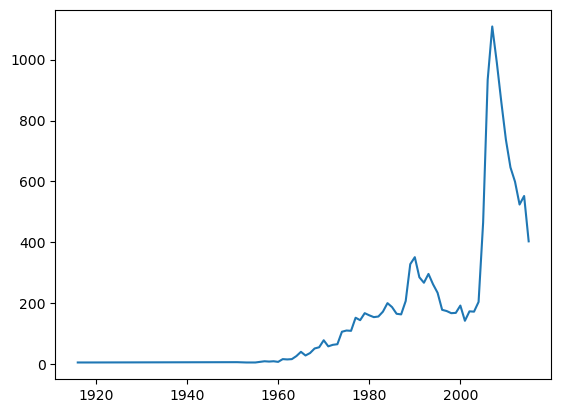

In [27]:
name_plot('F', 'Danica')

- Looking at the visualization, we can see that the female name `Danica` had a small rise in popularity around 1990, and peaked just before 2010.

- The function we created can be used to plot data from more than one name, so that we can see trends over time across different names.

- Let’s start by making our plot a little bit larger:

In [28]:
pp.figure(figsize = (18, 8))

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

- Next, let’s create a list with all the names we would like to plot:

In [29]:
names = ['Sammy', 'Jesse', 'Drew', 'Jamie']

- Now, we can iterate through the list with a for loop and plot the data for each name. First, we’ll try these gender neutral names as female names.
- to make this data easier to understand, let’s include a legend:

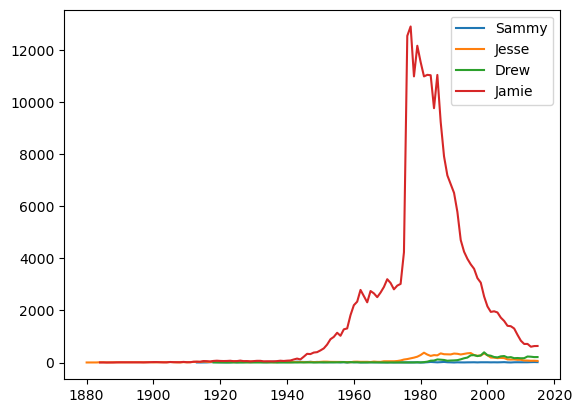

In [31]:
for name in names:
    name_plot('F', name)
    
pp.legend(names)


-  each of the names has been slowly gaining popularity as female names, the name Jamie was overwhelmingly popular as a female name in the years around 1980.

- Let’s plot the same names but this time as male names:

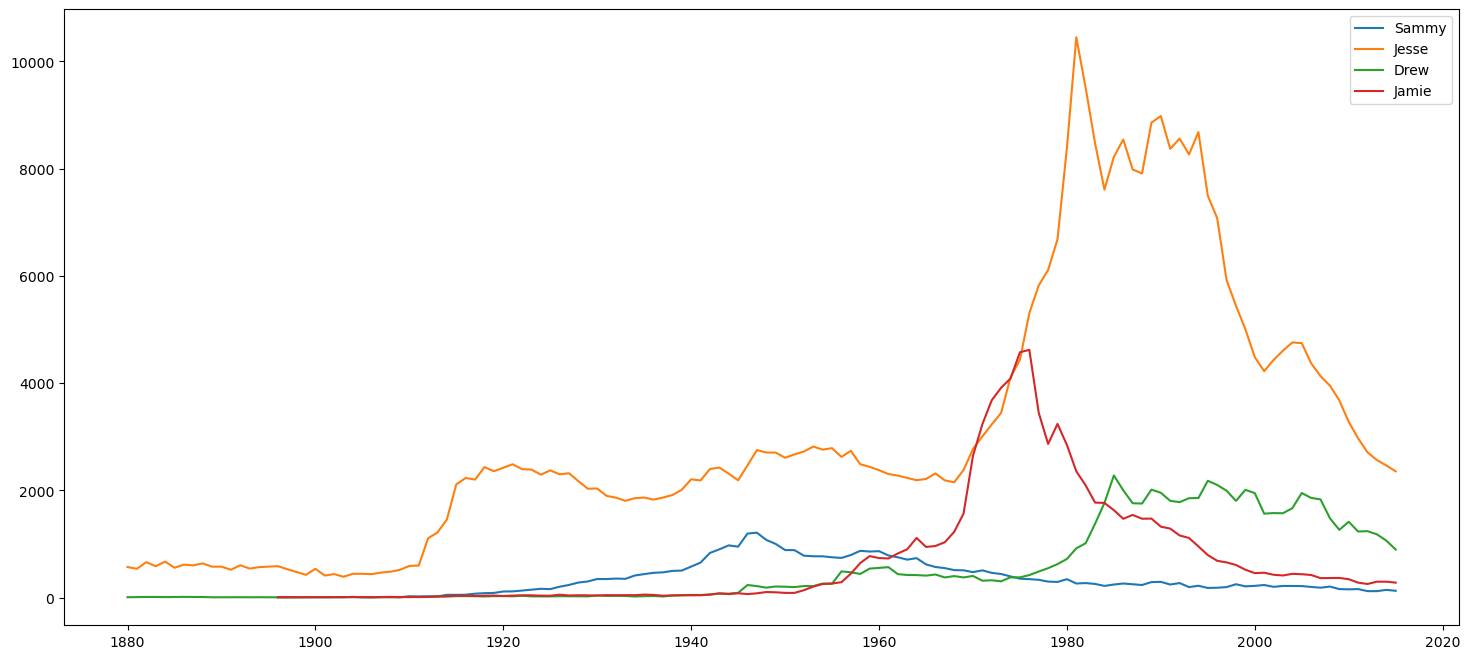

In [32]:
pp.figure(figsize = (18, 8))

names = ['Sammy', 'Jesse', 'Drew', 'Jamie']

for name in names:
    name_plot('M', name)
    
pp.legend(names)

- This data shows more popularity across names, with Jesse being generally the most popular choice, and being particularly popular in the 1980s and 1990s.

# Conclusion
- This tutorial introduced you to ways of working with large data sets from setting up the data, to grouping the data with `groupby()` and `pivot_table()`, indexing the data with a MultiIndex, and visualizing pandas data using the matplotlib package.

- Many organizations and institutions provide data sets that you can work with to continue to learn about pandas and data visualization. The US government provides data through data.gov, for example.

- source: https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3